In [30]:
!python friedmannequations.py

   Scale Factor (a)  ... Universe Time (Gyr)
0          0.990099  ...           13.476306
1          0.900164  ...           13.476306
2          0.825206  ...           13.476306
3          0.761773  ...           13.476306
4          0.707395  ...           13.476306

[5 rows x 10 columns]


In [31]:
import pandas as pd

def read_data():
    """
    Read the Friedmann equation data from a CSV file.

    Returns:
    pd.DataFrame: DataFrame containing the Friedmann equation data.
    """
    # Replace 'friedmann_data.csv' with the path to your CSV file
    df = pd.read_csv('cosmological_distances.csv')
    return df

data = read_data()

In [32]:
import matplotlib.pyplot as plt
def plot_distances(df, xaxis='Redshift (z)'):
    """
    Plot the distances from the Friedmann equation data.

    Parameters:
    df (pd.DataFrame): DataFrame containing the Friedmann equation data.
    """
    plt.figure(figsize=(10, 6))
    # plt.plot(df['Big Bang to z Travel Time (Gyr)'].iloc[0:1194], df['Comoving Distance (Mpc)'].iloc[0:1194], label='Comoving')
    plt.plot(df[xaxis].iloc[0:1000], df['Luminosity Distance (Mpc)'].iloc[0:1000], label='Luminosity')
    plt.plot(df[xaxis].iloc[0:1000], df['Proper Distance (Mpc)'].iloc[0:1000], label='Proper')
    plt.plot(df[xaxis].iloc[0:1000], df['Angular Distance (Mpc)'].iloc[0:1000], label='Angular')
    plt.title(f'Distances vs {xaxis}')
    plt.xlabel(f'{xaxis}')
    plt.ylabel(r'Distances ($Mpc$)')
    plt.loglog()
    plt.legend()
    plt.grid()
    return plt

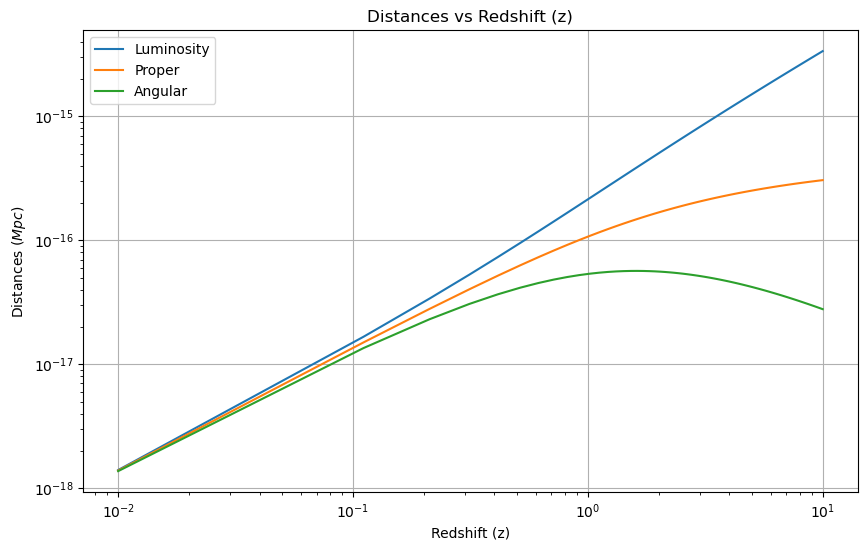

In [33]:
figure = plot_distances(data)

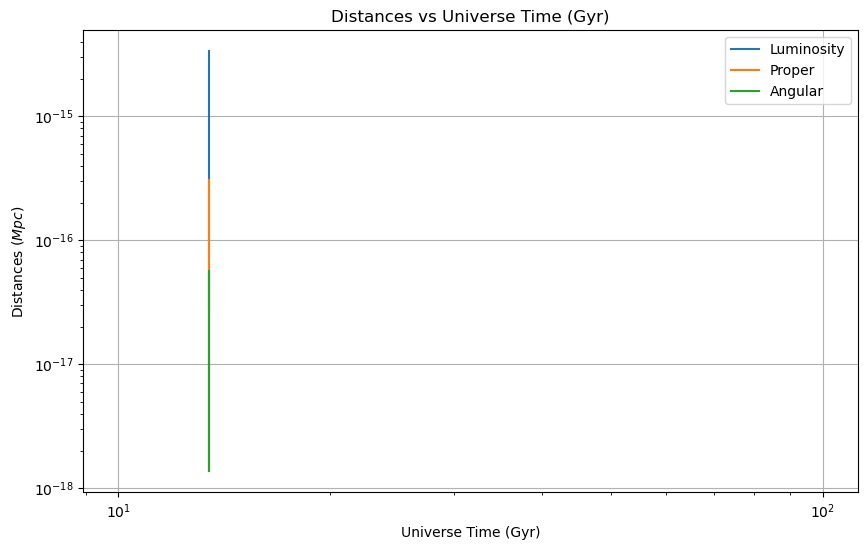

In [34]:
figure = plot_distances(data, xaxis='Universe Time (Gyr)')

# Time - Redshift

In [35]:
def plot_time_vs_redshift(df):
    """
    Plot the time vs redshift from the Friedmann equation data.

    Parameters:
    df (pd.DataFrame): DataFrame containing the Friedmann equation data.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df['Redshift (z)'].iloc[0:1000], df['Big Bang to z Travel Time (Gyr)'].iloc[0:1000], label='Big Bang to now')
    plt.title('Time vs Redshift')
    plt.xlabel('Redshift (z)')
    plt.ylabel('Time (Gyr)')
    plt.legend()
    plt.grid()
    return plt

(0.0, 10.0)

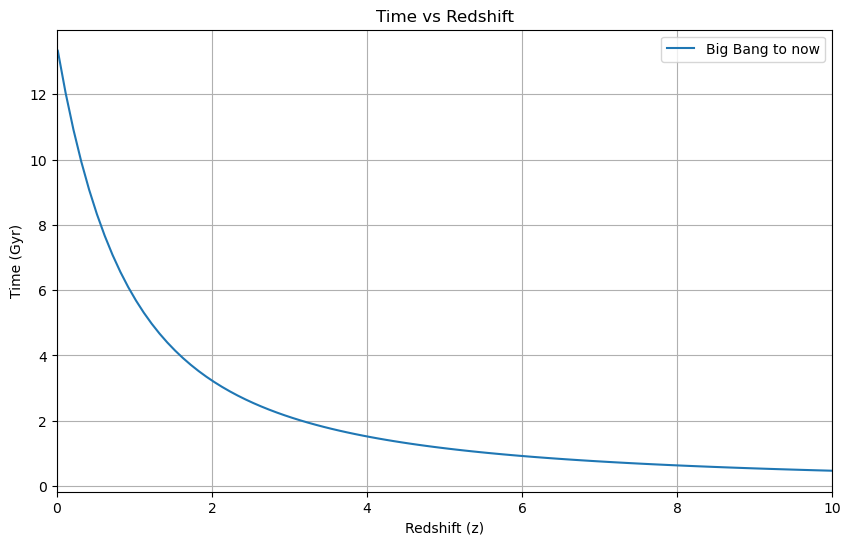

In [36]:
fig = plot_time_vs_redshift(data)
fig.xlim(0, 10)

# Scale Factor - Redshift/Time

In [ ]:
def plot_scale_factor(df, xaxis='Light Travel Time (Gyr)'):
    """
    Plot the scale factor from the Friedmann equation data.

    Parameters:
    df (pd.DataFrame): DataFrame containing the Friedmann equation data.
    """
    z = df[xaxis].iloc[0:1000]
    a = 1.0 / (1.0+z) # by definition a(t_0) = 1
    
    plt.figure(figsize=(10, 6))
    plt.plot(z, a, label='Scale Factor')
    plt.title(f'Scale Factor vs {xaxis}')
    plt.xlabel(f'{xaxis}')
    plt.ylabel('Scale Factor')
    plt.legend()
    plt.grid()
    return plt

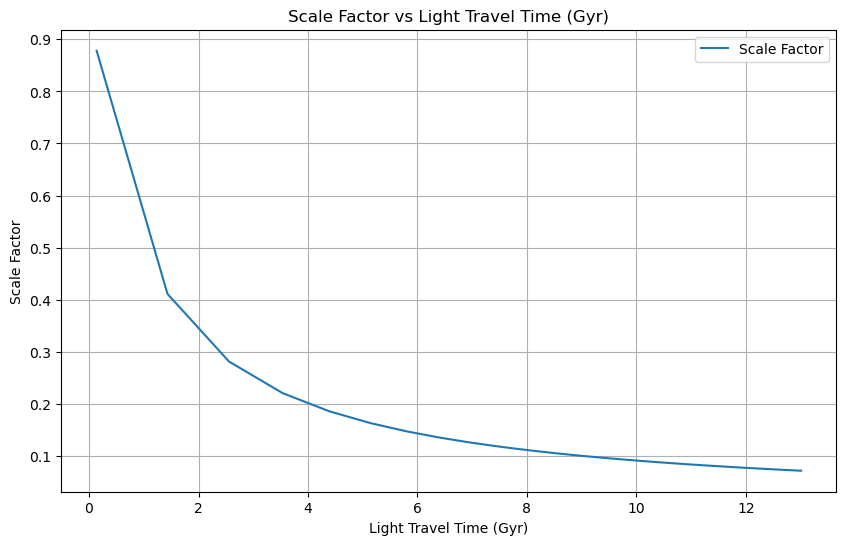

In [38]:
fig = plot_scale_factor(data)

<module 'matplotlib.pyplot' from '/Users/joanalnu/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

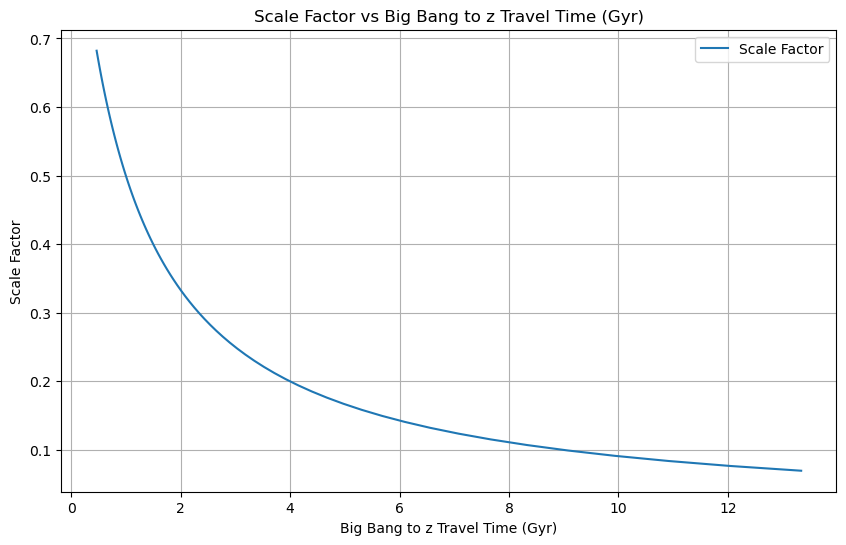

In [ ]:
plot_scale_factor(data, xaxis='Big Bang to z Travel Time (Gyr)')

### Discrepancy
This figure shows a discrepancy with the data from [https://github.com/gcanasherrera/CalculadoraCosmologica](https://https://github.com/gcanasherrera/CalculadoraCosmologica).

* How is the time between the Big Bang and $z$ up to $30$ Gyr in Cañas-Herrera's plot?
* Mine is a decreasing function because I have used $a = \frac{1}{1+z}$ and $t \propto z$. However, Cañas-Herrera's plot ain't log function, but it seems to be a polynomial with positive uneven exponent.

/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_49932/3777120338.py:19: RuntimeWarning: invalid value encountered in sqrt
  return 1.0 / (a * np.sqrt(H_sq))
/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_49932/3777120338.py:20: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, _ = quad(time_integrand, 0, a, args=(OmegaK,))


Time at z=0: 13.48 Gyr


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylin'

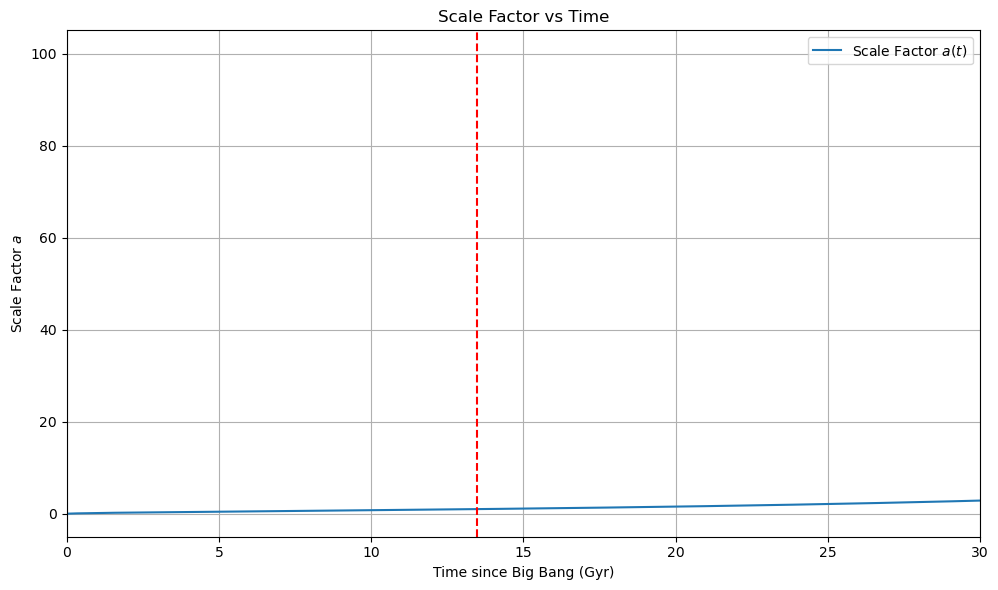

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from parameters import OmegaM, OmegaDE, OmegaR, H0

# Constants
H0_SI = H0 / 3.0857e19  # Convert H0 to s⁻¹
to_gyr = 3.1536e16  # seconds per Gyr

# Redshift and corresponding scale factor
redshift = np.linspace(-1000, 1000, 100000)
a_vals = 1 / (1 + redshift)
OmegaK = 1.0 - (OmegaM + OmegaDE + OmegaR)

# Time from Big Bang to given scale factor a
def cosmic_time_from_big_bang(a, OmegaK):
    def time_integrand(a, OmegaK):
        H_sq = OmegaDE + OmegaM * a**-3 + OmegaR * a**-4 + OmegaK * a**-2
        return 1.0 / (a * np.sqrt(H_sq))
    integral, _ = quad(time_integrand, 0, a, args=(OmegaK,))
    return (1 / H0_SI) * integral  # seconds

# Generate time values (one per scale factor)
time_gyr = np.array([cosmic_time_from_big_bang(ai, OmegaK) for ai in a_vals]) / to_gyr  # Gyr

# Plot scale factor vs cosmic time
def plot_scale_factor_with_time():
    plt.figure(figsize=(10, 6))
    plt.plot(time_gyr, a_vals, label='Scale Factor $a(t)$')
    plt.xlabel('Time since Big Bang (Gyr)')
    plt.ylabel('Scale Factor $a$')
    plt.title('Scale Factor vs Time')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    return plt

fig = plot_scale_factor_with_time()
#fig.yscale('log')

# add line for z = 0
# calculate t for z = 0 and a = 1
a_0 = 1.0
t_0 = cosmic_time_from_big_bang(a_0, OmegaK) / to_gyr  # Gyr
print(f"Time at z=0: {t_0:.2f} Gyr")
fig.axvline(x=t_0, color='r', linestyle='--', label='z = 0')
fig.xlim(0, 30)
fig.ylin(0,2.5)